<div align="center">

## Taller de Administración de Riesgos - Grupo 2

</div>


#### Ejercicio 1. Elija 2 acciones que coticen en NYSE y un índice bursátil. trabaje con los precios de los 2 últimos años (hasta la fecha actual)

#### a. Grafique los precios

In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tabulate import tabulate

# Data de los últimos dos años (TSLA, WMT, S&P 500)
tickers = ["IBM", "WMT", "^GSPC"] # Nota: ^GSPC es el ticker del S&P 500
fecha_inicio = "2023-01-22"
fecha_fin = "2025-01-23"

# Precios de cierre ajustados
data = yf.download(tickers, start=fecha_inicio, end=fecha_fin)["Adj Close"]
data.tail()

[*********************100%%**********************]  3 of 3 completed


Ticker,IBM,WMT,^GSPC
Date,,,
2025-01-15,220.029999,91.339996,5949.910156
2025-01-16,222.660004,91.300003,5937.339844
2025-01-17,224.789993,91.940002,5996.660156
2025-01-21,224.259995,93.080002,6049.240234
2025-01-22,223.259995,93.230003,6086.370117


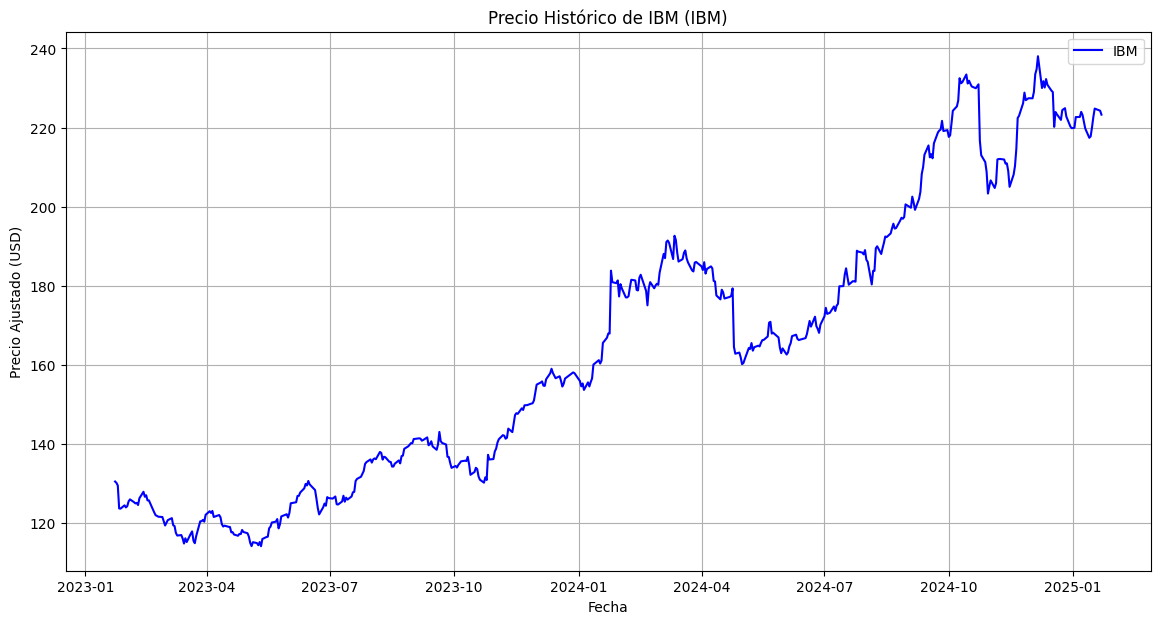

In [20]:
# IBM
plt.figure(figsize=(14, 7))
plt.plot(data.index, data["IBM"], label="IBM", color='blue')
plt.title("Precio Histórico de IBM (IBM)")
plt.xlabel("Fecha")
plt.ylabel("Precio Ajustado (USD)")
plt.grid()
plt.legend()
plt.show()

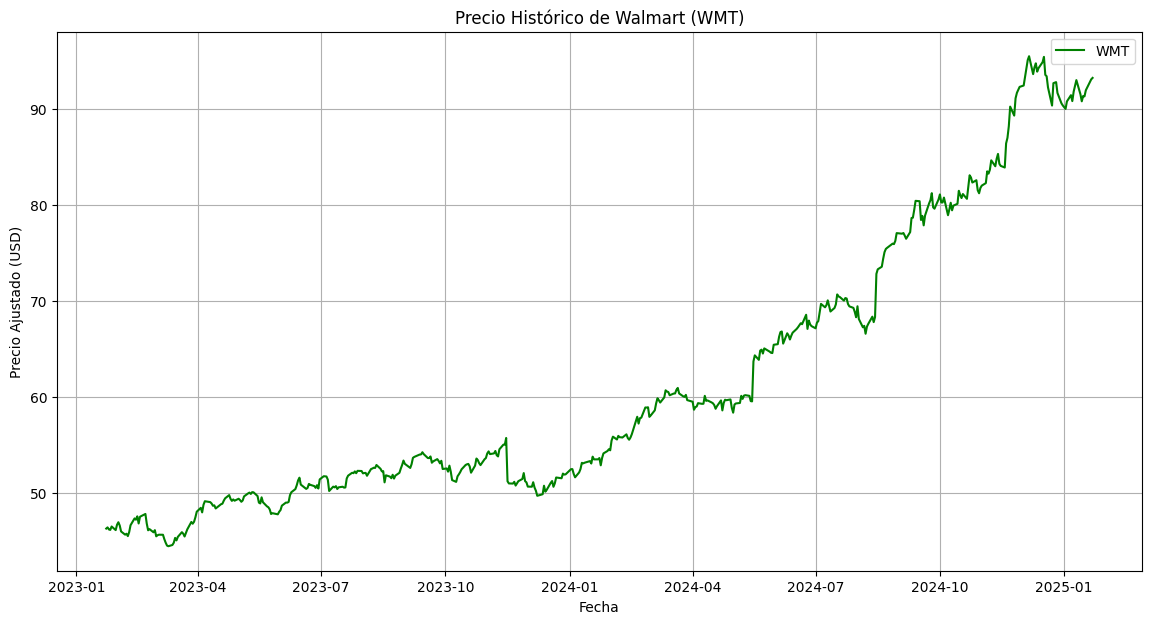

In [21]:
# Walmart
plt.figure(figsize=(14, 7))
plt.plot(data.index, data["WMT"], label="WMT", color='green')
plt.title("Precio Histórico de Walmart (WMT)")
plt.xlabel("Fecha")
plt.ylabel("Precio Ajustado (USD)")
plt.grid()
plt.legend()
plt.show()

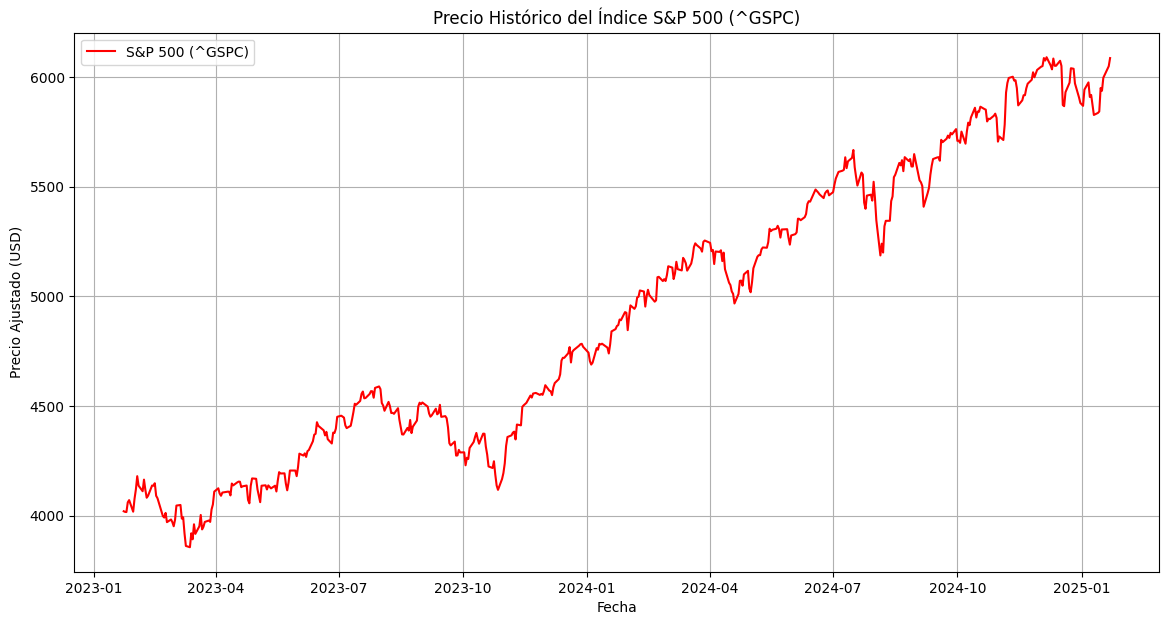

In [22]:
# S&P 500 (^GSPC)
plt.figure(figsize=(14, 7))
plt.plot(data.index, data["^GSPC"], label="S&P 500 (^GSPC)", color='red')
plt.title("Precio Histórico del Índice S&P 500 (^GSPC)")
plt.xlabel("Fecha")
plt.ylabel("Precio Ajustado (USD)")
plt.grid()
plt.legend()
plt.show()

#### b. Rendimiento Promedio Diario

In [23]:
rendimiento = data.pct_change().dropna()
rendimiento_promedio = rendimiento.mean()*100
print("Rendimientos promedio diario:")
print(rendimiento_promedio)

Rendimientos promedio diario:
Ticker
IBM      0.115148
WMT      0.145322
^GSPC    0.086052
dtype: float64


#### c. Graficar Rendimientos

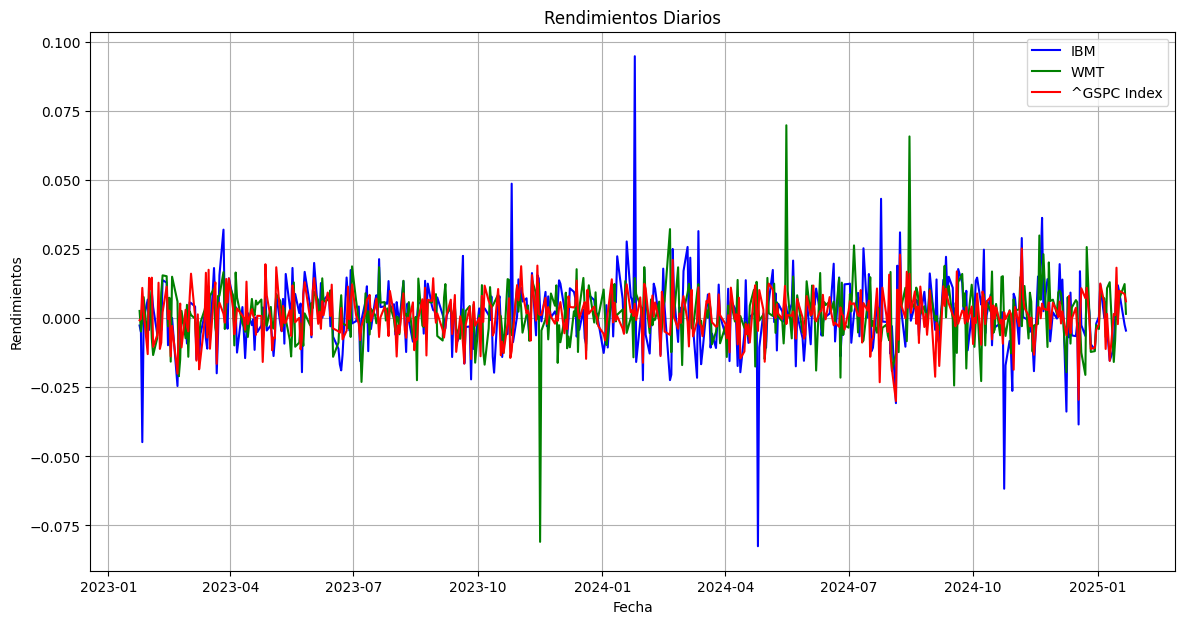

In [24]:
plt.figure(figsize=(14, 7))
for ticker in tickers:
    if ticker == 'IBM':
        plt.plot(rendimiento.index, rendimiento[ticker], label=ticker, color='blue')
    elif ticker == 'WMT':
        plt.plot(rendimiento.index, rendimiento[ticker], label=ticker, color='green')
    elif ticker == '^GSPC':
        plt.plot(rendimiento.index, rendimiento[ticker], label=ticker + " Index", color='red')
plt.title("Rendimientos Diarios")
plt.xlabel("Fecha")
plt.ylabel("Rendimientos")
plt.legend()
plt.grid()
plt.show()

#### d. Desviación estándar de los rendimientos

In [25]:
desv_estandar = rendimiento.std()*100
print("\nDesviación estándar de los rendimientos:")    #Riesgo Total
print(desv_estandar)


Desviación estándar de los rendimientos:
Ticker
IBM      1.251380
WMT      1.042570
^GSPC    0.802949
dtype: float64


#### f. Coeficiente de Correlación

In [26]:
coef_correlation = rendimiento.corr()
print("\nCoeficiente de correlación:")         #Correlación entre los activos
print(coef_correlation)


Coeficiente de correlación:
Ticker       IBM       WMT     ^GSPC
Ticker                              
IBM     1.000000  0.195400  0.405498
WMT     0.195400  1.000000  0.240526
^GSPC   0.405498  0.240526  1.000000


##### g. Coeficiente de Varianza

In [27]:
cv = (desv_estandar / rendimiento_promedio)
print("\nCoeficiente de variación:")             #Riesgo Relativo
print(cv)


Coeficiente de variación:
Ticker
IBM      10.867575
WMT       7.174201
^GSPC     9.330994
dtype: float64


##### h. Intervalos de Confianza

In [28]:
# Lista vacía para los intervalos de confianza
intervalo_de_confianza = []

# Niveles de confianza y sus factores (k)
niveles_de_confianza = [90, 95, 99]
factores_k = [1, 2, 3]

# Para cada nivel de confianza
for i in range(len(niveles_de_confianza)):
    nivel = niveles_de_confianza[i]
    k = factores_k[i]
    
    print(f"\nCalculando intervalo de confianza para {nivel}%:")

    # CCalculo de la cota inferior, cota superior y amplitud
    cota_inferior = rendimiento_promedio - k * desv_estandar
    cota_superior = rendimiento_promedio + k * desv_estandar
    amplitud = k * desv_estandar
    
    for ticker in rendimiento_promedio.index:
        intervalo_de_confianza.append({
            "Ticker": ticker,
            "Nivel de Confianza": f"{nivel}%",
            "Cota Inferior": round(cota_inferior[ticker], 6),
            "Cota Superior": round(cota_superior[ticker], 6),
            "Amplitud": round(amplitud[ticker], 6),
        })

# Conversión a DataFrame 
intervalo_de_confianza_df = pd.DataFrame(intervalo_de_confianza)

#  Resultados
print("\nIntervalos de confianza:")
print(tabulate(intervalo_de_confianza_df, headers="keys", tablefmt="grid"))




Calculando intervalo de confianza para 90%:

Calculando intervalo de confianza para 95%:

Calculando intervalo de confianza para 99%:

Intervalos de confianza:
+----+----------+----------------------+-----------------+-----------------+------------+
|    | Ticker   | Nivel de Confianza   |   Cota Inferior |   Cota Superior |   Amplitud |
+====+==========+======================+=================+=================+============+
|  0 | IBM      | 90%                  |       -1.13623  |        1.36653  |   1.25138  |
+----+----------+----------------------+-----------------+-----------------+------------+
|  1 | WMT      | 90%                  |       -0.897248 |        1.18789  |   1.04257  |
+----+----------+----------------------+-----------------+-----------------+------------+
|  2 | ^GSPC    | 90%                  |       -0.716898 |        0.889001 |   0.802949 |
+----+----------+----------------------+-----------------+-----------------+------------+
|  3 | IBM      | 95%        

##### i. Coeficiente Beta

In [ ]:
rendimiento_mercado = rendimiento["^GSPC"]
betas = {}
for ticker in ["IBM", "WMT"]:
    covarianza = rendimiento[ticker].cov(rendimiento_mercado)   # Si Beta > 1, el activo es más volátil que el mercado
    varianza = rendimiento_mercado.var()                        # Si Beta < 1, el activo es menos volátil que el mercado
    betas[ticker] = covarianza / varianza                       # Si Beta = 1, el activo tiene la misma volatilidad que el mercado
print("\nBetas:")                                               # Si Beta < 0, el activo se mueve en dirección opuesta al mercado
print(betas)                                                    


Betas:
{'IBM': 0.6319608878160106, 'WMT': 0.3123054751217445}


##### j. Interpretación de los Resultados

- Si el rendimiento del mercado aumenta 1%, el rendimiento de la acción de IBM aumenta 0.63%.
- Si el rendimiento del mercado aumenta 1%, el rendimiento de la acción de WMT aumenta 0.31%.